# Learning Lost function

## 1, Sum of squared error

$$
E = \frac{1}{2}\sum_k(y_k - t_k)^2
$$

y: output layer \
t: test data \
k: number of dimensional

In [1]:
import numpy as np


In [2]:
# Example
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # One hot expression

In [3]:
def sum_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [4]:
# correct answer is "2"
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# Example1
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [5]:
# Example2
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squared_error(np.array(y), np.array(t))

0.5975

## 2, cross entropy error

$$
E = -\sum_kt_k \log y_k
$$

$$
y_k: output \\
t_k: correct label
$$

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))


In [7]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [8]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

## 3, Minibatch Learning

$$
E = -\frac{1}{N}\sum_n \sum_k t_nk \log y_nk
$$

In [9]:
import sys, os
sys.path.append(os.pardir)
from chapter3.dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [10]:
# Extract 10 images at random
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(x_batch)
print(t_batch)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


## 4 Cross entropy error (batch support version)

In [11]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [12]:
# ont_hot False version
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

        print(f"t = {t}")
        print(f"y = {y}")

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 5 Differential

$$
\frac{df(x)}{dx} = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}
$$

In [13]:
# Bad execution
def numerical_diff(f, x):
    h = 1e-50 # Rounding error occured
    return (f(x+h) - f(x)) / h

In [14]:
# Rouding error example
np.float32(1e-50) # Too low in this value

0.0

In [15]:
# Improved version
def numerical_diff(f, x):
    h = 1e-4 # 10^-4
    # Center difference
    return (f(x + h) - f(x - h)) / (2 * h)

### 5-1 Numerical differentiation example

1. $ y = 0.01x^2 + 0.1x $

In [16]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

In [17]:
import matplotlib.pylab as plt

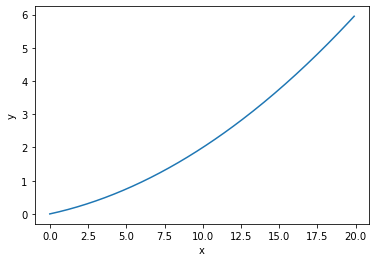

In [18]:
# draw graph
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

In [19]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


### draw graph

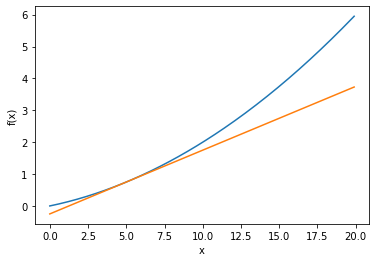

In [20]:
def target_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = target_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
# derivative result graph
plt.plot(x, y2)
plt.show()

### 5-2 Partial differential

$$f(x_0, x_1) = x_0^2 + x_1^2

In [21]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)

#### 5-2-1 Example

1. when $ x_0 = 3, x_1 = 4 $, how value of $ \frac{\sigma f}{\sigma x_0} $ ?

In [22]:
def function_tmp1(x0):
    return x0*x0 + 4.0 ** 2.0

In [23]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

2. When $x_0 = 3, x_1 = 4$, how value of $ \frac{\sigma f}{\sigma x_1} $?

In [24]:
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1
    

In [25]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 5-3 Gradient

A collection of partial differentials as a vector


In [26]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # Make a same list as x

    # debug
    print(grad)

    for idx in range(x.size):
        tmp_val = x[idx]

        # debug
        print(tmp_val)

        # calculate of f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # debug
        print(fxh1)

        # Calculate of f(x-h)
        x[idx] = tmp_val - h 
        fxh2 = f(x)

        # debug
        print(fxh2)

        grad[idx] = (fxh1-fxh2) / (2 * h)
        x[idx] = tmp_val # reset value

    return grad

In [27]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

[0. 0.]
3.0
25.00060001
24.99940001
4.0
25.00080001
24.99920001


array([6., 8.])

In [28]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

[0. 0.]
0.0
4.00000001
4.00000001
2.0
4.000400010000001
3.99960001


array([0., 4.])

In [29]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

[0. 0.]
3.0
9.000600010000001
8.999400009999999
0.0
9.00000001
9.00000001


array([6., 0.])

### 5-3-1 draw gradient graph

In [30]:
from mpl_toolkits.mplot3d import Axes3D

In [31]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val

    return grad

In [32]:
def _numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


In [33]:
def _function2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

In [34]:
def _tangent_line(f, x):
    d = _numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

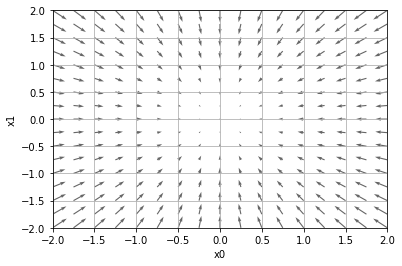

In [35]:
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = _numerical_gradient(_function2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

## 6, Gradient method

Finding the lowest function's value using gradient.

#### There are able to split for 2 types
1. gradient descent method: finding the lowest value
1. gradient ascent method: finding the highest value

※ But it's not really important

$$ x_0 = x_0 - \eta \frac{\sigma f}{\sigma x_0} $$
$$ x_1 = x_1 - \eta \frac{\sigma f}{\sigma x_1} $$

- $\eta$ is called "learning rate"

In [36]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)

        # debug
        print(grad)

        x -= lr * grad

    return x

### 6-1 example

1. Using $ f(x_0, x_1) = x_0^2 + x_1^2 $, How demand the lowest value?

In [37]:
def _function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(_function_2, init_x=init_x, lr=0.1, step_num=100)

[0. 0.]
-3.0
24.99940001
25.00060001
4.0
25.00080001
24.99920001
[-6.  8.]
[0. 0.]
-2.399999999999622
15.999520009998747
16.00048000999875
3.200000000000088
16.00064000999875
15.999360009998746
[-4.8  6.4]
[0. 0.]
-1.9199999999982538
10.239616009981374
10.240384009981373
2.5599999999976717
10.240512009981375
10.239488009981374
[-3.84  5.12]
[0. 0.]
-1.535999999998758
6.5532928099845495
6.5539072099845495
2.0479999999971596
6.554009609984551
6.55319040998455
[-3.072  4.096]
[0. 0.]
-1.228799999998806
4.194058249986998
4.194549769986998
1.6383999999969276
4.1946316899869975
4.193976329986999
[-2.4576  3.2768]
[0. 0.]
-0.9830399999989332
2.684157961991458
2.6845511779914575
1.3107199999975414
2.684616713991457
2.684092425991458
[-1.96608  2.62144]
[0. 0.]
-0.7864319999991682
1.717829641994193
1.7181442147941928
1.0485759999978548
1.7181966435941924
1.7177772131941933
[-1.572864  2.097152]
[0. 0.]
-0.6291455999992674
1.099385808652198
1.0996374668921975
0.8388607999982831
1.099679409932197

array([-6.11110793e-10,  8.14814391e-10])

### 6-1-1

### drawing graph

In [38]:
def _gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = [] # saving the log for drawing the graph

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


[0. 0.]
-3.0
24.99940001
25.00060001
4.0
25.00080001
24.99920001
[0. 0.]
-2.399999999999622
15.999520009998747
16.00048000999875
3.200000000000088
16.00064000999875
15.999360009998746
[0. 0.]
-1.9199999999982538
10.239616009981374
10.240384009981373
2.5599999999976717
10.240512009981375
10.239488009981374
[0. 0.]
-1.535999999998758
6.5532928099845495
6.5539072099845495
2.0479999999971596
6.554009609984551
6.55319040998455
[0. 0.]
-1.228799999998806
4.194058249986998
4.194549769986998
1.6383999999969276
4.1946316899869975
4.193976329986999
[0. 0.]
-0.9830399999989332
2.684157961991458
2.6845511779914575
1.3107199999975414
2.684616713991457
2.684092425991458
[0. 0.]
-0.7864319999991682
1.717829641994193
1.7181442147941928
1.0485759999978548
1.7181966435941924
1.7177772131941933
[0. 0.]
-0.6291455999992674
1.099385808652198
1.0996374668921975
0.8388607999982831
1.0996794099321974
1.099343865612198
[0. 0.]
-0.5033164799994578
0.7035867884782797
0.7037881150702794
0.671088639998648
0.703821

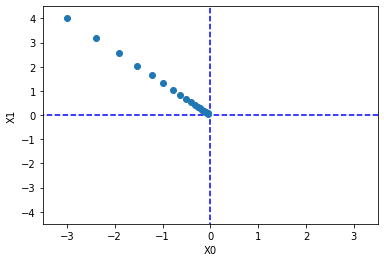

In [39]:
init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = _gradient_descent(function_2, init_x, lr, step_num)

plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:, 1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [40]:
# Bad example
# 1, Too much lerning rate value: lr=10.0

init_x = np.array([-3.0, 4.0])
gradient_descent(_function_2, init_x=init_x, lr=10.0, step_num=100)


[0. 0.]
-3.0
24.99940001
25.00060001
4.0
25.00080001
24.99920001
[-6.  8.]
[0. 0.]
57.0000000000378
9025.01140001297
9024.98860001297
-75.99999999999119
9024.98480001297
9025.015200012971
[ 114.         -152.00000001]
[0. 0.]
-1083.000000032122
3258024.7836810024
3258025.2168810023
1444.000000073205
3258025.2890810026
3258024.711481002
[-2165.99999927  2888.00000213]
[0. 0.]
20576.999992666308
1176147029.9788213
1176147021.7480211
-27436.000021235457
1176147020.3762212
1176147031.3506212
[ 41154.00075912 -54872.00021744]
[0. 0.]
-390963.00759858126
424589084133.1327
424589084289.5179
521284.002153142
424589084315.5821
424589084107.0685
[-781925.96435547 1042568.05419922]
[0. 0.]
7428296.635956107
153276661731618.12
153276661728646.8
-9904396.539839046
153276661728151.62
153276661732113.38
[ 14856562.5 -19808750. ]
[0. 0.]
-141137328.3640439
5.533262588560936e+16
5.533262588566581e+16
188183103.46016094
5.533262588567522e+16
5.533262588559995e+16
[-2.8224e+08  3.7632e+08]
[0. 0.]
268126

array([-2.58983747e+13, -1.29524862e+12])

In [41]:
# 2, Too low learning rate: lr = 1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(_function_2, init_x=init_x, lr=1e-10, step_num=100)

[0. 0.]
-3.0
24.99940001
25.00060001
4.0
25.00080001
24.99920001
[-6.  8.]
[0. 0.]
-2.9999999994
24.99940000000012
25.000599999999878
3.9999999992
25.00079999999984
24.999200000000158
[-6.  8.]
[0. 0.]
-2.9999999988
24.999399990000235
25.00059998999976
3.9999999984
25.000799989999678
24.999199990000317
[-6.  8.]
[0. 0.]
-2.9999999982
24.999399980000355
25.000599979999638
3.9999999976
25.000799979999517
24.999199980000476
[-6.  8.]
[0. 0.]
-2.9999999976
24.999399970000475
25.00059996999952
3.9999999967999997
25.000799969999356
24.999199970000635
[-6.          7.99999999]
[0. 0.]
-2.9999999969999998
24.999399960000595
25.0005999599994
3.9999999959999997
25.000799959999195
24.999199960000794
[-5.99999999  7.99999999]
[0. 0.]
-2.9999999963999997
24.999399950000715
25.000599949999277
3.9999999951999996
25.000799949999035
24.999199950000953
[-5.99999999  7.99999999]
[0. 0.]
-2.9999999957999997
24.999399940000835
25.000599939999155
3.9999999943999995
25.000799939998874
24.999199940001112
[-5.

array([-2.99999994,  3.99999992])

### 6-2, Gradient of neural network

$$
W = \begin{pmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23}
\end{pmatrix} \
$$

$$
\frac{\sigma L}{\sigma W} = \begin{pmatrix}
\frac{\sigma L}{\sigma w_{11}} & \frac{\sigma L}{\sigma w_{12}} & \frac{\sigma L}{\sigma w_{13}} \\
\frac{\sigma L}{\sigma w_{21}} & \frac{\sigma L}{\sigma w_{22}} & \frac{\sigma L}{\sigma w_{23}}
\end{pmatrix} \
$$

In [42]:
import sys, os
sys.path.append(os.pardir)
from shared_code.functions import softmax, cross_entropy_error
from shared_code.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss


In [43]:
# using simpleNet
net = simpleNet()
print(net.W)
print()

# input data
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

# Max value of index
np.argmax(p)


t =  np.array([0, 0, 1])
net.loss(x, t)

[[-0.28052452  0.77718236  0.09382703]
 [ 0.68535324  0.45900258  1.09474855]]

[0.44850321 0.87941174 1.04156992]


0.8766913393821926

In [44]:
# Find the gradient
def f(W): # W is a dummy value
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.13798861  0.21231683 -0.35030544]
 [ 0.20698291  0.31847525 -0.52545816]]


In [45]:
# another execute
f = lambda w : net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.13798861  0.21231683 -0.35030544]
 [ 0.20698291  0.31847525 -0.52545816]]


### 7, Execute of machine learning algorithm

#### 7-1, Tow layer neaural network

In [46]:
import sys, os
sys.path.append(os.pardir)
from shared_code.functions import *
from shared_code.gradient import numerical_gradient

In [47]:
# Make a class
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,
                weight_init_std=0.01):
        
        # Weight initialization
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x: input data  t:training data
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

In [48]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b1'].shape)

(784, 100)
(100,)
(100, 10)
(100,)


In [49]:
# how to execute for predict function
x = np.random.rand(100, 784)
y = net.predict(x)


In [51]:
# Example
x = np.random.rand(100, 784)  # dummy input data
t = np.random.rand(100, 10)   # dummy correct label

# calculate of gradient
grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)


(784, 100)
(100,)
(100, 10)
(10,)


#### 7-2, Training newural network